### 표준화(standardization)
- 보통 척도 조절을 위해 표준화를 많이 진행하는데, 그 중에서도 평균이 0 표준편차가 1인 표준정규분포로 표준화를 많이 진행함

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as ss
from sklearn.preprocessing import StandardScaler
np.random.seed(42)
data = np.random.randint(30, size=(6, 5))

# (1) numpy를 이용한 표준화
# 컬럼마다 각각의 평균, 표준편차를 적용하려면 axis = 0 지정해 주어야 함
data_standardization = (data - np.mean(data, axis = 0)) / np.std(data, axis = 0)
np.mean(data_standardization, axis = 0)
np.std(data_standardization, axis = 0)
data_standardization

# (2) scipy.stats을 이용한 표준화 : ss.zscore()
ss.zscore(data)

# (3) sklearn.preprocessing 을 이용한 표준화 : StandardScaler().fit_transform()
data_standardized_skl = StandardScaler().fit_transform(data)
data_standardized_skl

array([[-1.34227633,  0.31199226,  1.70211289, -0.41412128, -0.63370969],
       [-1.2183739 ,  1.30302651,  0.89318795, -1.46032242,  1.20609263],
       [ 0.14455284,  0.64233701, -0.11796822, -0.93722185,  0.96078565],
       [ 0.3923577 , -1.44984639, -0.42131507,  0.762855  , -1.61493758],
       [ 0.51626013,  0.42210718, -1.02800878,  0.762855  , -0.5110562 ],
       [ 1.50747958, -1.22961656, -1.02800878,  1.28595556,  0.59282519]])

### 이상치, 특이값이 들어있는 데이터의 표준화(Scaling data with outliers)
- 이상치 특이값 제거 후 표준화 변환
- median, IQR을 이용해서 척도 표준화
- KNN non-parametric modeling

np.mean :  9.792306965211813
np.std  :  1.8072323532892591
standardScaler np.mean : -1.7763568394002505e-17
standardScaler np.std : 1.0
np.median :  9.812341596031427
IQR :  2.2429925124559222


(array([ 0.,  0.,  0.,  1.,  0.,  0.,  3.,  2.,  2.,  4.,  5.,  3.,  8.,
        11., 11.,  8., 11.,  7.,  4.,  8.,  2.,  2.,  5.,  1.,  0.,  0.,
         0.,  0.,  0.]),
 array([-3.00e+00, -2.80e+00, -2.60e+00, -2.40e+00, -2.20e+00, -2.00e+00,
        -1.80e+00, -1.60e+00, -1.40e+00, -1.20e+00, -1.00e+00, -8.00e-01,
        -6.00e-01, -4.00e-01, -2.00e-01,  2.66e-15,  2.00e-01,  4.00e-01,
         6.00e-01,  8.00e-01,  1.00e+00,  1.20e+00,  1.40e+00,  1.60e+00,
         1.80e+00,  2.00e+00,  2.20e+00,  2.40e+00,  2.60e+00,  2.80e+00]),
 <a list of 29 Patch objects>)

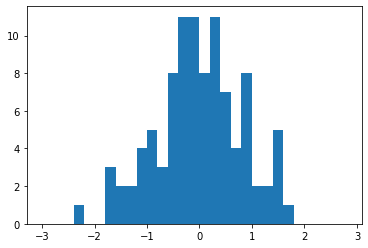

In [ ]:
# (1) sklearn.preprocessing.RobustScaler() 
# --> (x - median) / IQR
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler
import matplotlib.pyplot as plt
import pandas as pd

np.set_printoptions(precision = 2)
np.random.seed(42)
mu, sigma = 10, 2
x = mu + sigma * np.random.randn(100)
x

# check histogram
#plt.hist(x)

# mean, std
print("np.mean : ", np.mean(x))
print("np.std  : ", np.std(x))

# inserting outliers
x[98:100] = 100
#plt.hist(x, bins = np.arange(0, 102, 2))

# (1) 이상치가 포함된 데이터의 표준정규분포로의 표준화 : StandardScaler()
x = x.reshape(-1, 1)
x_standardScaler = StandardScaler().fit_transform(x)

# mean = 0, std = 1로 포준정규분포 기반 표준화 수행됨
print("standardScaler np.mean :", np.mean(x_standardScaler))
print("standardScaler np.std :", np.std(x_standardScaler))

# histogram 확인 결과, 이상치 때문에 제대로 확인 불가
# plt.hist(x_standardScaler)

# 이상치를 걸러내고 확인.
x_standardScaler_zoomin = x_standardScaler[x_standardScaler < 5]
# plt.hist(x_standardScaler_zoomin, bins = np.arange(-3.0, 3.0, 0.2))

# (2) median, IQR를 이용한 표준화
print("np.median : ", np.median(x))
print("IQR : ", np.quantile(x, q = 0.75) - np.quantile(x, q = 0.25))

x_RobustScaler = RobustScaler().fit_transform(x)
# plt.hist(x_RobustScaler)

x_RobustScaler_zoomin = x_RobustScaler[x_RobustScaler < 5]
plt.hist(x_RobustScaler_zoomin, bins = np.arange(-3.0, 3.0, 0.2))

### 정규화(normalization) : MinMaxScaler(), minmax_scale()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, minmax_scale
X = np.array(
    [[10., -10, 1.],
    [5., 0., 2.],
    [0., 10., 3.]])

# (1) 직접 최대 최소 값 구해서 계산
X_MinMax = (X - X.min(axis = 0)) / (X.max(axis = 0) - X.min(axis = 0))

# (2) MinMaxScaler 이용
x_minMaxScaler = MinMaxScaler().fit_transform(X)
x_minMaxScaler

# (3) minmax_scale 이용
X_MinMax_scaled = minmax_scale(X, axis = 0, copy = True)
X_MinMax_scaled

array([[1. , 0. , 0. ],
       [0.5, 0.5, 0.5],
       [0. , 1. , 1. ]])

### 이항변수화 변환(feature binarization)
- 성공확률이 p인 베르누이 시행을 n번 반복했을 때 성공하는 횟수를 X라 하면, 확률 변수 X는 모수 n과 p인 이항분포를 따른다고 함
- sklearn.preprocessing.Binarizer() 함수를 이용해서 특정 임계값을 기준으로 0,1로 변환

In [ ]:
from sklearn.preprocessing import Binarizer, binarize
np.random.seed(42)
x = np.array(np.random.randn(12).reshape(4, 3))

# (1) Binarizer()를 이용한 이항변수화
binarizer = Binarizer().fit(x.reshape(-1, 1))
binarizer.transform(x)

# threshold --> 2.0 으로 변환
binarizer = Binarizer(threshold = 2.0).fit(x.reshape(-1, 1))
binarizer.transform(x)

# (2) sklearn.preprocessing.binarize() 를 이용한 이항변수화
# --> trasform 함수가 없음
binarize(X)
binarize(X, threshold = 2.0)
binarize(X, threshold = 2.0, copy = False) # 원본 값 자체가 이항변수화됨

### 범주형 변수 oneHotEcoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
data = np.array([[0, 0, 0], [0, 1, 1], [0, 2, 2], [1, 0, 3], [1, 1, 4]])
enc = OneHotEncoder()
enc.fit(data)
enc.transform(np.array([[1, 2, 4]])).toarray()

array([[0., 1., 0., 0., 1., 0., 0., 0., 0., 1.]])